# **Tutorial paso a paso sobre cómo agregar etiquetas en los gráficos en Matplotlib y Seaborn en Python** 

## Matplotlib
Matplotlib es una librería de visualización de datos de Python muy potente y flexible. La forma más sencilla de agregar etiquetas en los gráficos de Matplotlib es utilizando la función text() de la clase Axes. La sintaxis básica es la siguiente:

Text(1, 1, 'Etiqueta')

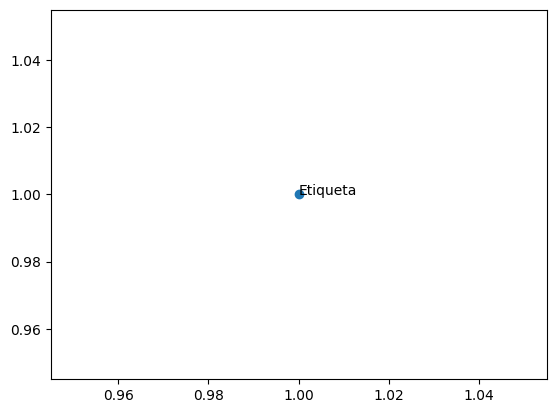

In [2]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots()

# Agregar un punto en las coordenadas (1, 1)
ax.scatter(1, 1)

# Agregar una etiqueta en las coordenadas (1, 1)
ax.text(1, 1, 'Etiqueta')


En este ejemplo, utilizamos la función subplots() de Matplotlib para crear una figura y un eje, y luego utilizamos la función scatter() para agregar un punto en las coordenadas (1, 1). Luego, utilizamos la función text() para agregar una etiqueta en las mismas coordenadas.

### Etiquetas con formato

Podemos agregar etiquetas con formato en los gráficos utilizando la función format() de Python dentro de la función text(). Por ejemplo:

Text(1, 1, 'Valor: 3.14')

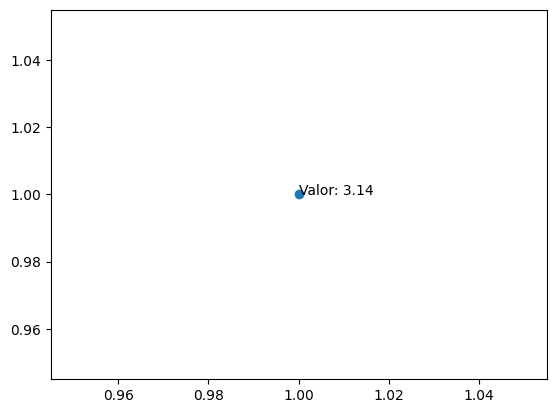

In [4]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Agregar un punto en las coordenadas (1, 1)
ax.scatter(1, 1)

# Agregar una etiqueta con formato en las coordenadas (1, 1)
ax.text(1, 1, 'Valor: {:.2f}'.format(3.14159))


En este ejemplo, la función format() se utiliza para mostrar el valor numérico de 3.14159 con dos decimales en la etiqueta.

### Etiquetas con flechas
También podemos agregar etiquetas con flechas utilizando la función annotate() de la clase Axes. La sintaxis básica es la siguiente:

Text(1.05, 1.05, 'Etiqueta')

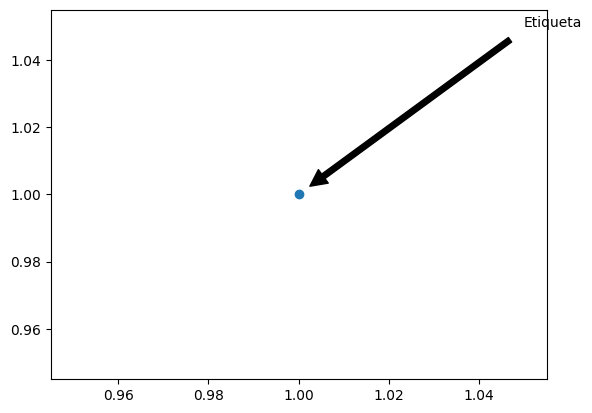

In [18]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Agregar un punto en las coordenadas (1, 1)
ax.scatter(1, 1)

# Agregar una etiqueta con flecha en las coordenadas (1, 1)
ax.annotate('Etiqueta', xy=(1, 1), xytext=(1.05, 1.05), arrowprops=dict(facecolor='black', shrink=0.05))


En este ejemplo, utilizamos la función annotate() para agregar una etiqueta con flecha en las coordenadas (1, 1), y especificamos las coordenadas del extremo de la flecha (xy) y del texto (xytext), así como las propiedades de la flecha (arrowprops).

**Ejemplo**

Agregando anotaciones en un gráfico de barras creando la función addlabels y usando la función text()

In [84]:
# Definiendo lista de periodo y % de impuesto
x,y = ["Diciembre 2022", "Enero 2023"], [35, 39.6]

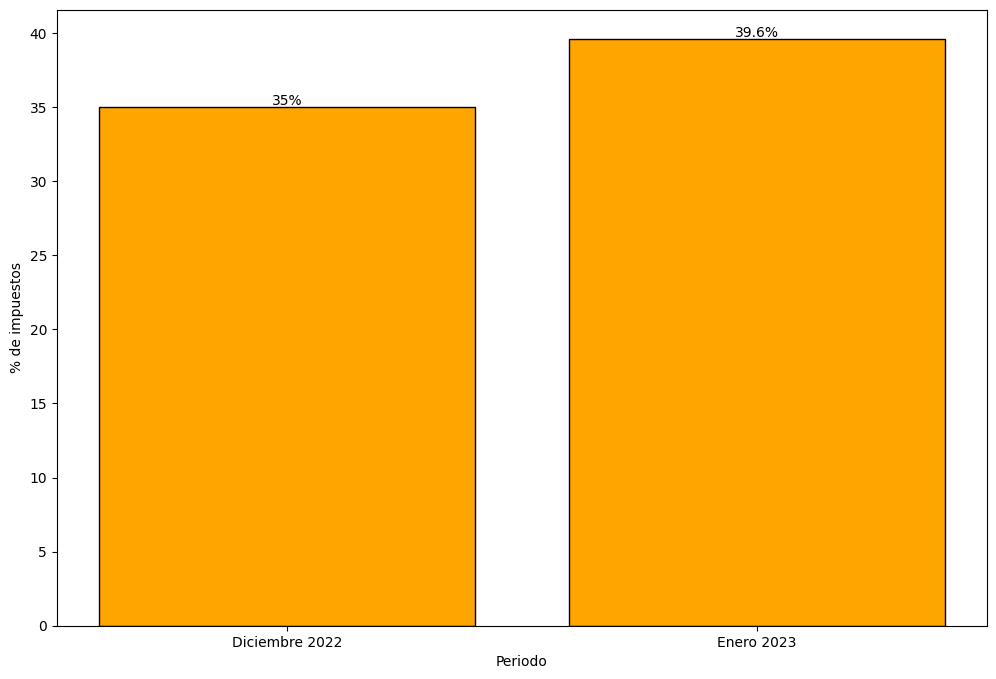

In [85]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.15,str(y[i])+'%', ha = 'center')

plt.figure(figsize=(12,8))
plt.bar(x,y,edgecolor='k', color = 'orange')
addlabels(x, y)
plt.xlabel('Periodo')
plt.ylabel('% de impuestos')
plt.show()

## Seaborn
Seaborn es una librería de visualización de datos de Python que se basa en Matplotlib y proporciona una interfaz más sencilla y orientada a objetos para la creación de gráficos estadísticos. 

Para agregar etiquetas en los gráficos de Seaborn, podemos utilizar la función text() de la clase Axes de Matplotlib dentro de la función de trazado correspondiente de Seaborn.
Para algunos casos tambien nos ayudará usar annotate.

### Gráfico de barras (promedio de total bill por día)
Por ejemplo, para agregar etiquetas en un gráfico de barras de Seaborn, podemos utilizar la función text() dentro del bucle for que recorre los valores de cada barra:

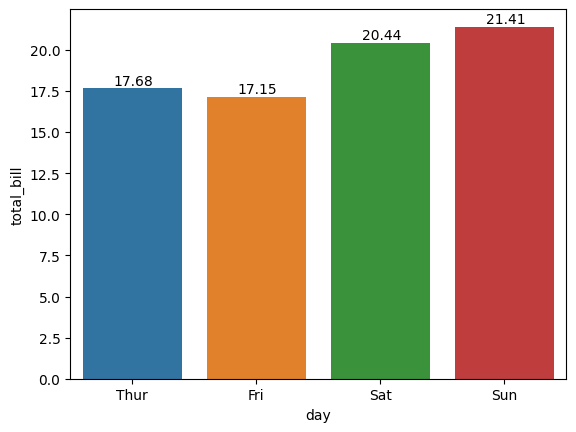

In [39]:
import seaborn as sns

# Cargar datos de ejemplo
tips = sns.load_dataset("tips")

# Crear un gráfico de barras con Seaborn
ax = sns.barplot(data=tips, x="day", y="total_bill",errorbar=None) # errorbar es lo mismo que colocar, ci=None. Solo que ci esta deprecando 

# Agregar etiquetas con los valores numéricos
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2 - 0.15, p.get_height() + 0.2, '{:.2f}'.format(p.get_height()))


En este ejemplo, utilizamos la función barplot() de Seaborn para crear un gráfico de barras a partir de los datos de ejemplo tips. Luego, utilizamos un bucle for para recorrer los valores de cada barra (p), y utilizamos la función text() de Matplotlib para agregar una etiqueta con el valor numérico de cada barra en la posición correspondiente (p.get_x() + p.get_width() / 2 - 0.15, p.get_height() + 0.2).

### Gráfico de puntos
Para agregar etiquetas en un gráfico de puntos de Seaborn, podemos utilizar la función text() dentro del bucle for que recorre los valores de cada punto:

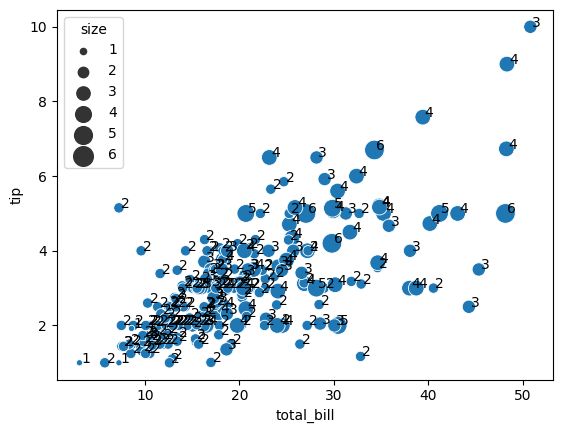

In [40]:
# Crear un gráfico de puntos con Seaborn
ax = sns.scatterplot(data=tips, x="total_bill", y="tip", size="size", sizes=(20, 200))

# Agregar etiquetas con los valores numéricos
for line in range(0, tips.shape[0]):
    ax.text(tips.total_bill[line]+0.2, tips.tip[line], tips['size'][line], horizontalalignment='left', size='medium', color='black')


Como vemos en el gráfico anterior agregarle las etiquetas no ayudan mucho dado que no se ven claramente.

Probemos si queremos filtrar solo Size=1

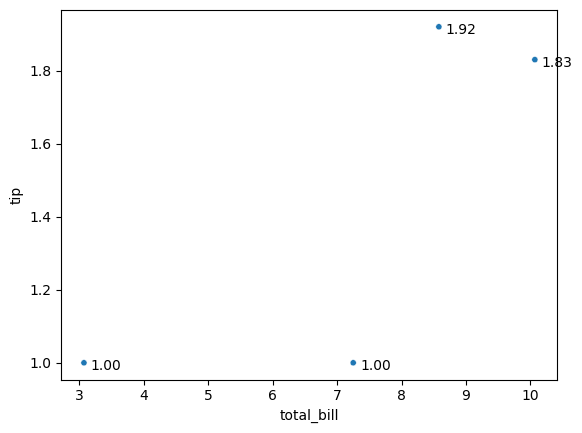

In [50]:
# Filtrar los datos donde size=1
tips_filtered = tips[tips["size"] == 1]

# Crear un gráfico de puntos con Seaborn
ax = sns.scatterplot(data=tips_filtered, x="total_bill", y="tip", size="size", sizes=(20, 200), legend=False)

# Agregar anotaciones para cada punto individual
for x, y in zip(tips_filtered["total_bill"], tips_filtered["tip"]):
    plt.annotate("%.2f" % y, (x, y), xytext=(5, -5), textcoords="offset points")

# Mostrar el gráfico
plt.show()

### Gráfico de líneas
Para agregar etiquetas en un gráfico de líneas de Seaborn, podemos utilizar la función annotate() para agregar una anotación para cada punto individual.

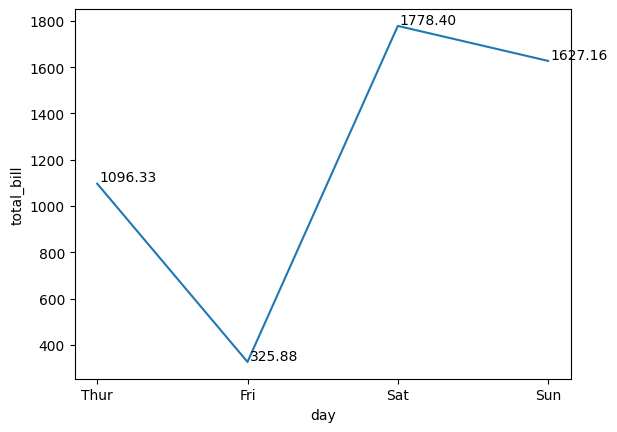

In [55]:
# Calcular la suma de total_bill por día
total_bill_sum = tips.groupby("day")["total_bill"].sum().reset_index()

# Crear un gráfico de líneas con Seaborn
sns.lineplot(data=total_bill_sum, x="day", y="total_bill")

# Agregar anotaciones para cada punto individual
for x, y in zip(total_bill_sum["day"], total_bill_sum["total_bill"]):
    plt.annotate("%.2f" % y, (x, y), xytext=(1.5, 1.5), textcoords="offset points")

# Mostrar el gráfico
plt.show()


La función annotate() toma como primer argumento el texto que se mostrará como anotación, y como segundo argumento una tupla con las coordenadas (x,y) del punto al que se agregará la anotación. Además, utilizamos el argumento xytext para desplazar el texto a la derecha y hacia arriba ((1.5, 1.5)) y el argumento textcoords para especificar que las coordenadas de xytext se dan como desplazamiento en puntos ("offset points").

### Más ejemplos

**Ejemplo:**

Realizando un grafico de histograma de la variable total_bil y colocando las etiquetas sobre cada bin 

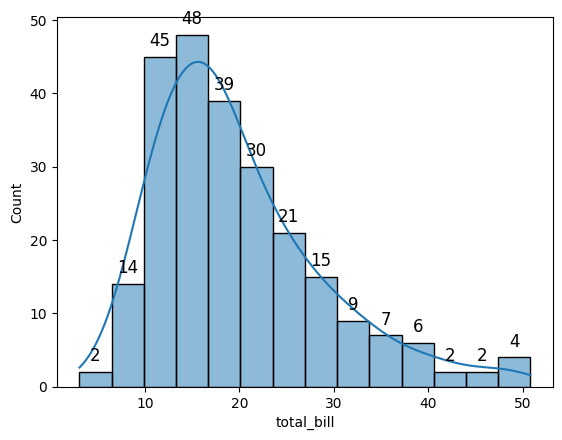

In [57]:
# Crear un histograma con Seaborn
ax = sns.histplot(data=tips, x="total_bill", kde=True)

# Agregar etiquetas con valores numéricos a los bins del histograma
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

**Ejemplo:**

Suma de Total Bill por Día

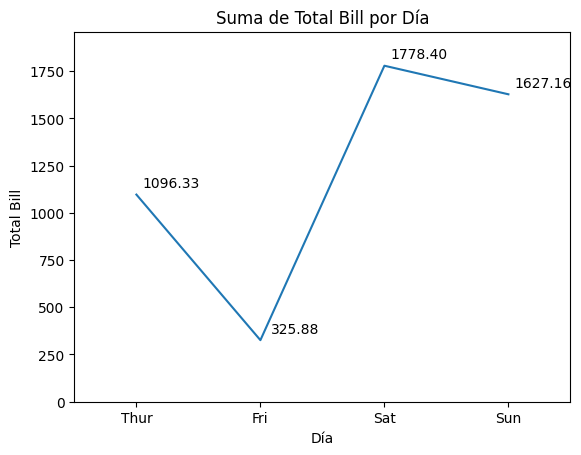

In [83]:
# Importar librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset de ejemplo
tips = sns.load_dataset("tips")

# Calcular la suma de total_bill por día
total_bill_sum = tips.groupby("day")["total_bill"].sum().reset_index()

# Crear un gráfico de líneas con Seaborn
sns.lineplot(data=total_bill_sum, x="day", y="total_bill")

# Agregar anotaciones para cada punto individual
for x, y in zip(total_bill_sum["day"], total_bill_sum["total_bill"]):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(25,5), ha='center')

# Establecer límites de los ejes
plt.xlim(-0.5, len(total_bill_sum["day"]) - 0.5)
plt.ylim(0, max(total_bill_sum["total_bill"]) * 1.1)

# Agregar título y etiquetas de los ejes
plt.title("Suma de Total Bill por Día")
plt.xlabel("Día")
plt.ylabel("Total Bill")

# Mostrar el gráfico
plt.show()


En este ejemplo, además de las anotaciones y la creación del gráfico de líneas, se incluyen algunas buenas prácticas adicionales:

- Formatear los valores de las anotaciones para que se muestren solo dos decimales.

- Especificar la posición de las anotaciones utilizando el argumento xytext en lugar de usar un valor fijo.

- Establecer los límites de los ejes utilizando las funciones xlim() y ylim().

- Agregar un título y etiquetas para los ejes utilizando las funciones title(), xlabel(), y ylabel().

Es importante tener en cuenta que las anotaciones deben ser claras y legibles, y no deben superponerse con otros elementos del gráfico. 

Además, las anotaciones deben ser relevantes y proporcionar información útil sobre los datos que se están visualizando. 

Por lo tanto, se recomienda ajustar la posición y el tamaño de las anotaciones según sea necesario para lograr una presentación clara y efectiva de los datos.

Con estas buenas prácticas en mente, puedes agregar anotaciones de manera efectiva a tus gráficos para resaltar información importante y mejorar la comunicación de tus hallazgos.